# # Projet sans vent

In [1]:
import numpy as np
from random import *
import matplotlib.pyplot as plt

L = 20

In [2]:
choix = input('Voulez-vous choisir manuellement la direction et l intensité du vent? 1: manuellement     2: Automatiquement')
print('Vous avez choisi le choix :',choix)
choix = int(choix)

Voulez-vous choisir manuellement la direction et l intensité du vent? 1: manuellement     2: Automatiquement1
Vous avez choisi le choix : 1


In [3]:
if choix == 1:
    x = input('i_0 = ?')
    y = input('j_0 = ?')
else:
    liste1 = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2]
    liste2 = liste1
    x = choice(liste1)
    y = choice(liste2)
    print(x)
    print(y)

i_0 = ?0.5
j_0 = ?1


In [4]:
Matrice  = np.zeros((L,L))
(long,larg) = Matrice.shape

In [5]:
Matrice

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  

In [6]:
def foyer():
    i = randint(2,L-2)
    j = randint(2,L-2)
    Matrice[i,j] = Matrice[i,j] + 1
    return (i, j)
    print(i, j)
    


In [7]:
i,j = foyer()

In [8]:
def case_neutre(Matrice,i,j):
    for h in range(35):
        i_ = randint(2,L-2)
        j_ = randint(2,L-2)
        if i != i_ and j!= j_ :
            Matrice[i_,j_] = -1

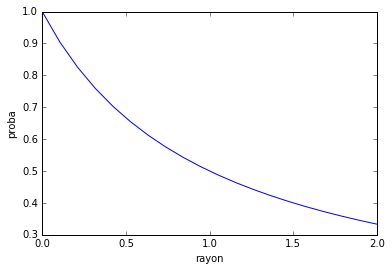

In [9]:
def proba_feu(rayon, alpha=1.0):
    p = 1.0 / ((1.0 + rayon) ** alpha)
    return p
    
r_min = 0.0
r_max = 2.0
rayons = np.linspace(r_min, r_max, num=20)
probas_feu = np.array([proba_feu(r) for r in rayons])

plt.plot(rayons, probas_feu)
plt.xlabel("rayon")
plt.ylabel("proba")

plt.show()



def matrice_proba():
    p = np.zeros((3, 3))
    i_0, j_0 = x, y
    # i_1, j_1 = ?, ?  # dépend de ventx venty
    for i in range(0, 3):
        for j in range(0, 3):
            rayon = np.sqrt((i - i_0)**2 + (j - j_0)**2)
            p[i, j] = proba_feu(rayon,alpha = 1.0)
    return p


In [10]:
p = matrice_proba()
print(p)

TypeError: unsupported operand type(s) for -: 'int' and 'str'

In [11]:
def propa(ancienne_matrice,nouvelle_matrice,p,i,j):
    nouvelle_matrice[i,j] = ancienne_matrice[i,j]  # Copier l'ancienne matrice dans la nouvelle
    if nouvelle_matrice[i,j] == 1:  # i.e. elle est en feu
        for di in [-1, 0 ,+1]:
            for dj in [-1, 0,+1]:
                if nouvelle_matrice[i+di,j+ dj] == 0: # si arbre sain
                    x = np.random.binomial(1, p[di +1,dj +1])
                    nouvelle_matrice[i+di,j+dj] = x
    nouvelle_matrice[i,j] = nouvelle_matrice[i,j] + (1/2)                
    return nouvelle_matrice

In [ ]:
def filter_proba(p):
    p = p ** (T_ref/T)
    return p

In [ ]:
def affiche_matrice(Matrice):
    (n,m) = Matrice.shape
    for i in range(2,n-1) :
        for j in range(2,m-1) :
            if Matrice[i,j] == 0 :
                print("A", end="")
            elif Matrice[i, j] >= 1 and Matrice[i, j] < 2 :
                print("F", end="")
            elif Matrice[i, j] >= 2 :
                print(".", end="")
            elif Matrice[i,j] < 0 :
                print(" ",end="")
        print("")        

In [ ]:
def next_step(Matrice):
    new_mat = np.zeros((L,L))
    for i in range(2,L-1):
        for j in range(2,L-1): 
            propa(Matrice, new_mat,p ,i ,j)
    return new_mat

In [ ]:
def matricenorm(ancienne_matrice,nouvelle_matrice,i,j) :
    if ancienne_matrice[i,j] < 0:
        nouvelle_matrice[i,j] = 0
    elif 0 <= ancienne_matrice[i,j] < 1 :
        nouvelle_matrice[i,j] = 1
    elif 1 <= ancienne_matrice[i,j] < 2 :
        nouvelle_matrice[i,j] = 2
    elif ancienne_matrice[i,j] >= 2 :
        nouvelle_matrice[i,j] = 3
    return nouvelle_matrice    

In [ ]:
# ma

In [ ]:
Matrice  = np.zeros((L,L))
(long,larg) = Matrice.shape
i,j = foyer()
case_neutre(Matrice,i,j)
def simulation(Matrice):
    nb_pas = 30
    affiche_matrice(Matrice)
    print("")
    for k in range (nb_pas):
        Matrice = next_step(Matrice)
        affiche_matrice(Matrice)
        print("")
simulation(Matrice)  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


# --- Colormaps from a list ---

colors = ['red', 'blue', 'green','gray']  # R -> G -> B
n_bins = [4]  # Discretizes the interpolation into bins
cmap_name = 'ma_colormap'
#
size = np.array(Matrice.shape)
dpi = 20
figsize= size[1]/float(dpi),size[0]/float(dpi)
fig = plt.figure(figsize = figsize, dpi = dpi, facecolor = "white")
fig = plt.figure(facecolor = "white")
fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon = False)
im=plt.imshow(Matrice, interpolation = 'nearest', cmap = LinearSegmentedColormap. from_list(cmap_name,colors,n_bins))
# plt.xticks([]), plt.yticks([])
#
import matplotlib.animation as animation

def update(*args):
    simulation(Matrice)
    im.set_array(Matrice)
    return [im]

ani = animation.FuncAnimation(fig, update, frames=range(20), interval=50)
plt.show()


In [ ]:
def graph2 (Matrice, i, j):
    
    # on importe tout de matplotlib
# numpy est accessible via l'alias 'np'
    from pylab import *

# on crée un graphique de 8x6 pouces 
# avec une résolution de 80 points par pouce
    figure(figsize=(8,6), dpi=80)

# on crée une nouvelle vue dans une grille de 1 ligne x 1 colonne
    subplot(2,L-1,1)

    X = (color = 'blue')
    
show()
    
    return

In [ ]:
graph2(Matrice,i,j)

In [ ]:
np.unique(Matrice)